<a href="https://colab.research.google.com/github/mudgal-mayank/Interstellar/blob/main/Cooper_Station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

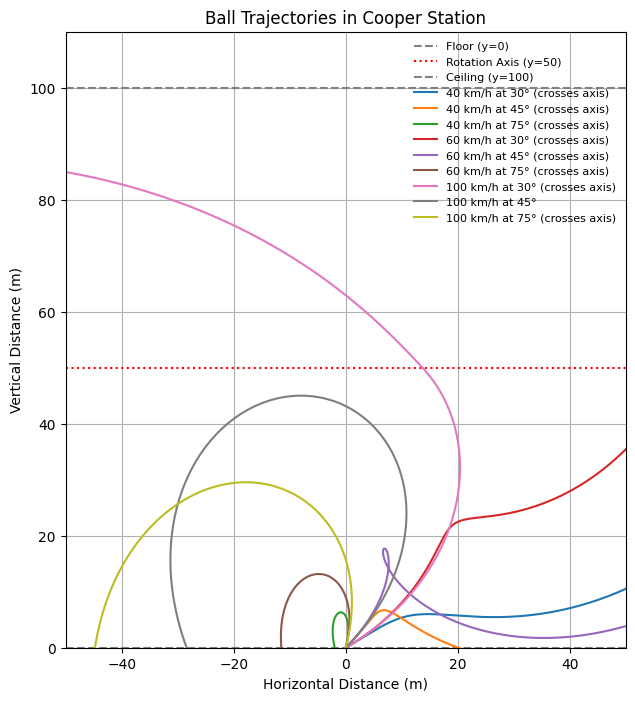

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
R = 50.0  # Radius of Cooper Station (m)
H = 100.0  # Total station height (m)
y_axis = 50.0  # Midpoint where gravity reverses
g = 9.81  # Artificial gravity at outer surface
omega = np.sqrt(g / R)  # Rotation rate (~0.443 rad/s)

def effective_gravity(y):
    """Gravity is downward (-g) below y=50 and upward (+g) above y=50."""
    return -g if y < y_axis else g

def equations(t, state, omega):
    """Equations of motion in the rotating frame."""
    x, y, vx, vy = state
    ax = -2 * omega * vy + omega**2 * x  # Coriolis + centrifugal forces
    ay =  2 * omega * vx + omega**2 * y + effective_gravity(y)
    return [vx, vy, ax, ay]

# Select fewer key speeds and angles
angles = [30, 45, 75]  # Fewer angles for clarity
speeds_kmph = [40, 60, 100]  # Reduced speed cases
speeds_mps = [v / 3.6 for v in speeds_kmph]  # Convert km/h to m/s

# Time span
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Plot setup
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', linestyle='--', label="Floor (y=0)")
plt.axhline(y_axis, color='red', linestyle=':', label="Rotation Axis (y=50)")
plt.axhline(H, color='gray', linestyle='--', label="Ceiling (y=100)")

# Simulate and plot trajectories
for v in speeds_mps:
    for angle in angles:
        angle_rad = np.radians(angle)
        vx0, vy0 = v * np.cos(angle_rad), v * np.sin(angle_rad)
        state0 = [0, 0, vx0, vy0]
        sol = solve_ivp(equations, t_span, state0, args=(omega,), t_eval=t_eval, rtol=1e-8, atol=1e-8)
        x_traj, y_traj = sol.y[0], sol.y[1]

        # Label trajectory only if it crosses 50m axis
        label = f"{v*3.6:.0f} km/h at {angle}°"
        if np.max(y_traj) >= y_axis:
            label += " (crosses axis)"
        plt.plot(x_traj, y_traj, label=label)

plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.title("Ball Trajectories in Cooper Station")
plt.xlim(-50, 50)
plt.ylim(0, 110)
plt.legend(loc="upper right", fontsize=8, frameon=False)  # Move legend to side
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
